# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


Let's check the number of images in training, validation, and testing sets.

In [2]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

print(os.listdir('/data/dog_images/'))

for directory in os.listdir('/data/dog_images/'):
    number_of_files = 0
    for sub_directory in os.listdir(f'/data/dog_images/{directory}'):
        number_of_files += len(os.listdir(f'/data/dog_images/{directory}/{sub_directory}'))
    print(f'Number of {directory} files: {number_of_files}')

['train', 'test', 'valid']
Number of train files: 6680
Number of test files: 836
Number of valid files: 835


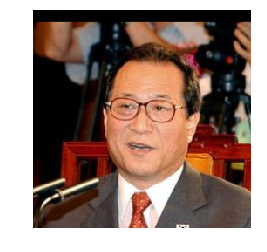

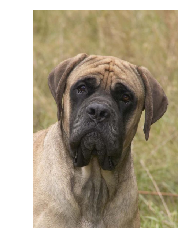

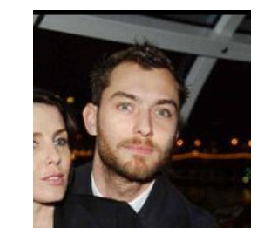

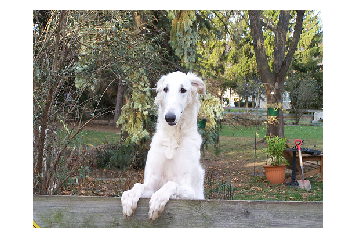

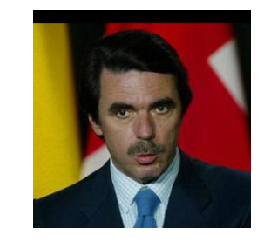

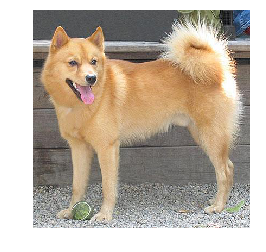

In [3]:
from PIL import Image

for i in [12, 183, 347]:
    img1 = Image.open(human_files[i])
    img2 = Image.open(dog_files[i])
    plt.axis('off')
    plt.imshow(img1)
    plt.show()
    plt.axis('off')
    plt.imshow(img2)
    plt.show()

Let's check the distribution of those files.

In [4]:
train_data_dist = pd.Series()
valid_data_dist = pd.Series()
test_data_dist = pd.Series()

for sub_directory in os.listdir('/data/dog_images/train/'):
    train_data_dist.loc[sub_directory] = len(os.listdir(f'/data/dog_images/train/{sub_directory}'))
    
for sub_directory in os.listdir('/data/dog_images/valid/'):
    valid_data_dist.loc[sub_directory] = len(os.listdir(f'/data/dog_images/valid/{sub_directory}'))
    
for sub_directory in os.listdir('/data/dog_images/test/'):
    test_data_dist.loc[sub_directory] = len(os.listdir(f'/data/dog_images/test/{sub_directory}'))

In [5]:
print(f'Training set:\n{train_data_dist.describe()}')
print(f'\nValidation set:\n{valid_data_dist.describe()}')
print(f'\nTest set:\n{test_data_dist.describe()}')

Training set:
count    133.000000
mean      50.225564
std       11.863885
min       26.000000
25%       42.000000
50%       50.000000
75%       61.000000
max       77.000000
dtype: float64

Validation set:
count    133.000000
mean       6.278195
std        1.350384
min        4.000000
25%        6.000000
50%        6.000000
75%        7.000000
max        9.000000
dtype: float64

Test set:
count    133.000000
mean       6.285714
std        1.712571
min        3.000000
25%        5.000000
50%        6.000000
75%        8.000000
max       10.000000
dtype: float64


Let's visualize the image distribution by breed.

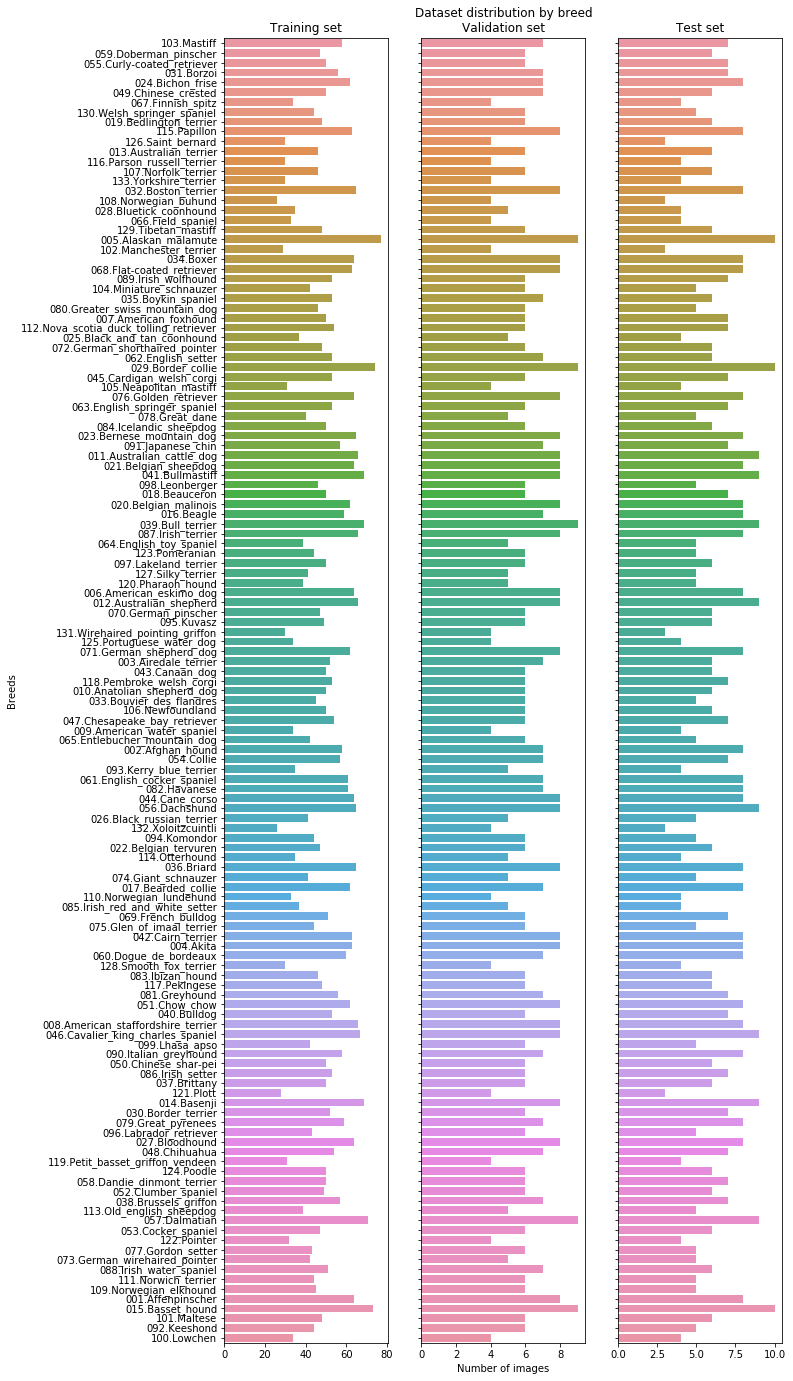

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (10,24), sharey = True)

sns.barplot(ax=ax1, x = train_data_dist.values, y = train_data_dist.index)
sns.barplot(ax=ax2, x = valid_data_dist.values, y = valid_data_dist.index)
sns.barplot(ax=ax3, x = test_data_dist.values, y = test_data_dist.index)
ax1.set_ylabel('Breeds')
ax2.set_xlabel('Number of images')
ax1.set_title('Training set')
ax2.set_title('Dataset distribution by breed\nValidation set')
ax3.set_title('Test set');

In [20]:
data_df = pd.concat([train_data_dist, valid_data_dist, test_data_dist], axis = 1)
data_df.columns = ['Train', 'Validation', 'Test']
data_df.head()

,Train,Validation,Test
103.Mastiff,58,7,7
059.Doberman_pinscher,47,6,6
055.Curly-coated_retriever,50,6,7
031.Borzoi,56,7,7
024.Bichon_frise,62,7,8


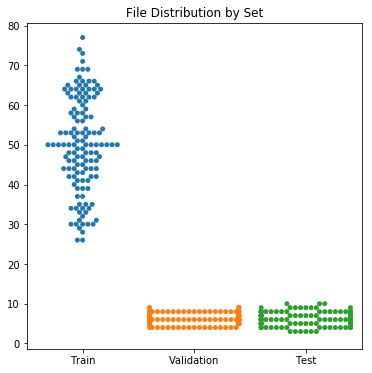

In [29]:
plt.figure(figsize=(6,6))
sns.swarmplot(data = data_df)
plt.title('File Distribution by Set');

<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


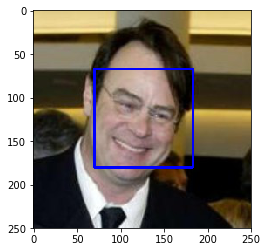

In [4]:
import cv2                               

# extract pre-trained face detector
face_cascade_alt = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade_alt.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [5]:
# returns "True" if face is detected in image stored at img_path
def face_detector_alt(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade_alt.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [5]:
human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
number_of_human_faces = 0
humans_among_dogs = 0

for file in human_files_short:
    number_of_human_faces += face_detector_alt(file)

for file in dog_files_short:
    humans_among_dogs += face_detector_alt(file)
    
print(f'{number_of_human_faces} out of 100 human faces detected')    
print(f'{humans_among_dogs} faces detected in dog files')

98 out of 100 human faces detected
17 faces detected in dog files


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

I downloaded a few other XML files for face detection from https://github.com/opencv/opencv/tree/master/data/haarcascades and will compare their performances.

In [6]:
# extract pre-trained face detector
face_cascade_default = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')
face_cascade_alt2 = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt2.xml')
face_cascade_alt_tree = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt_tree.xml')

# define a function for each of the classifiers
def face_detector_default(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade_default.detectMultiScale(gray)
    return len(faces) > 0

def face_detector_alt2(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade_alt2.detectMultiScale(gray)
    return len(faces) > 0

def face_detector_alt_tree(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade_alt_tree.detectMultiScale(gray)
    return len(faces) > 0

In [7]:
# loop over the new face detectos and print out their performance
for face_detector in [face_detector_alt2, face_detector_default, face_detector_alt_tree]:
    print(f'{face_detector.__name__} results:')
    number_of_human_faces = 0
    number_of_faces_among_dogs = 0
    # check the current face_detector on human images
    for file in human_files_short:
        number_of_human_faces += face_detector(file)
    # now check it on dog images
    for file in dog_files_short:
        number_of_faces_among_dogs += face_detector(file)
    print(f'{number_of_human_faces} of out 100 human faces detected')
    print(f'{number_of_faces_among_dogs} human faces detected in 100 dog files')

face_detector_alt2 results:
100 of out 100 human faces detected
21 human faces detected in 100 dog files
face_detector_default results:
100 of out 100 human faces detected
60 human faces detected in 100 dog files
face_detector_alt_tree results:
57 of out 100 human faces detected
2 human faces detected in 100 dog files


```alt2``` and ```default``` detected all of the human faces, but ```dafault``` also detected a lot of human faces in dog images. I will use ```face_detector_alt2``` because it has the lowest false positive rate among classifiers with 100% true positive rate. If the dog detector, which I will work on in the next step, does its job well, then the high false positive rate in the face detector won't matter.

I also noticed that the classifiers work much faster on human face images than on dog images. It must be due to the image sizes. See below for an example.

In [11]:
height = 0
width = 0
for file in range(len(human_files_short)):
    img = cv2.imread(human_files_short[file])
    height += img.shape[0]
    width += img.shape[1]
print('Human images')
print(f'Average height: {height/len(human_files_short)}, average width: {width/len(human_files_short)}')

Human images
Average height: 250.0, average width: 250.0


In [12]:
height = 0
width = 0
for file in range(len(dog_files_short)):
    img = cv2.imread(dog_files_short[file])
    height += img.shape[0]
    width += img.shape[1]
print('Dog images')
print(f'Average height: {height/len(dog_files_short)}, average width: {width/len(dog_files_short)}')

Dog images
Average height: 697.32, average width: 692.44


In [13]:
%%time
face_detector_alt2(human_files_short[0])

CPU times: user 89.7 ms, sys: 17 µs, total: 89.7 ms
Wall time: 27.6 ms


True

In [14]:
%%time
face_detector_alt2(dog_files_short[0])

CPU times: user 1.01 s, sys: 0 ns, total: 1.01 s
Wall time: 266 ms


False

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [3]:
from PIL import Image
import torch
import torchvision.models as models
import torchvision.transforms as transforms

# check if CUDA is available
use_cuda = torch.cuda.is_available()

In [6]:
# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:41<00:00, 13306720.43it/s]


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [7]:
def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    # prepare the transforms:
    # resize the image to 224x224 (minimum size expected by VGG-16)
    # convert the image to tensor
    # normalize the image
    transform = transforms.Compose([transforms.Resize((224, 224)),
                                    transforms.ToTensor(),
                                    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])
    
    # open image with Pillow
    img = Image.open(img_path)
    
    # transform the image given the earlier transforms
    # also, the image currently has 3 dimensions: number of channels, height, and width
    # VGG expects the batch size dimension at the beginning of the tuple.
    # We add that batch size dimenssion by calling 'unsqueeze(0)' on the img variable.
    # 0 refers to the index of the new dimension
    img = transform(img).unsqueeze(0)
    
    # use CUDA if available
    if use_cuda:
        img = img.cuda()
    
    # set the model into evaluation mode
    VGG16.eval()
    
    # get the prediction by passing the image to the model: VGG16(img)
    # get the max value and its index by passing the tensor and dimension: torch.max(VGG16(img),1)
    # access the index of the index: [1]
    # convert the resulting tensor to a number: .item()
    return torch.max(VGG16(img),1)[1].item()

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [8]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    index = VGG16_predict(img_path)
    return (index > 150 and index < 269) # true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__  
0% of ```human_files_short``` have a detected dog  
100% of ```dog_files_short``` have a detected dog

In [11]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
human_file_detections = 0
dog_file_detections = 0
file_counter = 0

for file in human_files_short:
    if dog_detector(file) == 1:
        print(f'Dog detected in human_files_short at index {file_counter}')
    human_file_detections += dog_detector(file)
    file_counter += 1
print(f'{human_file_detections} dogs detected in human files')

for file in dog_files_short:
    dog_file_detections += dog_detector(file)
print(f'{dog_file_detections} dogs detected in dog files')

0 dogs detected in human files
100 dogs detected in dog files


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [19]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [26]:
import os
from torchvision import datasets

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
batch_size = 32

# specify train and test/validation transforms
scratch_train_transforms = transforms.Compose([transforms.Resize(256),
                                        transforms.RandomResizedCrop(224),
                                        transforms.RandomHorizontalFlip(),
                                        transforms.RandomRotation(5),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

scratch_test_transforms = transforms.Compose([transforms.Resize(256),
                                        transforms.RandomResizedCrop(224),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

# specify file locations
train_loc = '/data/dog_images/train/'
valid_loc = '/data/dog_images/valid/'
test_loc = '/data/dog_images/test/'

# specify datasets
train_data = datasets.ImageFolder(train_loc, transform = scratch_train_transforms)
valid_data = datasets.ImageFolder(valid_loc, transform = scratch_test_transforms)
test_data = datasets.ImageFolder(test_loc, transform = scratch_test_transforms)

# specify dataloaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size, shuffle = True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size = batch_size)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = batch_size)

# specicy the loader dictionary for later use
loaders_scratch = {'train':train_loader, 'valid':valid_loader, 'test':test_loader}

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:  
The training images are first resized to 256 pixels on the shorter edge and then cropped to 224x224. Training images are also randomly flipped horizontally and are rotated 5 degrees. Validation and test images are resized to 256 pixels on the shorter side and then cropped to 224x224. All images are normalized as the final step. 224x224 was chosen because that's the accepted format for ```VGG-19``` and ```ResNet50``` which will be used later for transfer learning.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [13]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        # convolutional layers
        self.conv1 = nn.Conv2d(3, 16, 3, padding = 1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding = 1)
        self.conv3 = nn.Conv2d(32, 64, 3, padding = 1)
        self.conv4 = nn.Conv2d(64, 128, 3, padding = 1)
        # max pooling layer
        self.maxpool = nn.MaxPool2d(2,2)
        # fully connected layers
        self.fc1 = nn.Linear(14*14*128, 1024)
        self.fc2 = nn.Linear(1024, 133)
        # dropout layer
        self.dropout = nn.Dropout(0.3)
    def forward(self, x):
        ## Define forward behavior
        # put the input through a convolutional layer, apply ReLU, put output through the maxpooling layer
        x = F.relu(self.conv1(x))
        x = self.maxpool(x)
        x = F.relu(self.conv2(x))
        x = self.maxpool(x)
        x = F.relu(self.conv3(x))
        x = self.maxpool(x)
        x = F.relu(self.conv4(x))
        x = self.maxpool(x)
        # flatten the input
        x = x.view(-1, 14*14*128)
        # put the output throught the fully connected layers (ReLU after first) with a dropout layer in-between
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__  
Model architechture:  
```Conv2d (16 channels out) -> ReLU -> MaxPool(2,2) -> Conv2d (32) -> ReLU -> MaxPool(2,2) ->  
Conv2d (64) -> ReLU -> MaxPool(2,2) -> Conv2d (128) -> ReLU -> MaxPool(2,2) ->  
Linear(14*14*128, 1024) -> ReLU -> Dropout(0.3) -> Linear(1024, 133)```  
The 4 convolutional layers extract the features and double in depth each time while the 4 max pooling layers after them half the height and width of the input tensor. At the end, two fully connected layers convert the extracted features into a score for each class with a dropout layer between them to reduce overfitting.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [14]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr = 0.04, momentum = 0.7, nesterov = True)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [4]:
# import time module to time training epochs
import time

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    # create a Pandas DataFrame to keep track of losses to visualize them
    loss_df = pd.DataFrame(columns=['train_loss', 'valid_loss'])
    
    # training and validation loop
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        # get starting time
        start_time = time.time()
        # set losses to 0
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            # zero the gradient
            optimizer.zero_grad()
            # put the data through the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # compute the gradient
            loss.backward()
            # update the parameters with an optimization step
            optimizer.step()
            # update training loss
            train_loss += loss.item()*data.size(0)
            
        ######################    
        # validate the model #
        ######################
        
        # You are such a great model! Dog classification is so difficult, and you do your job so well!
        
        # Now, the other kind of validation
        
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            # put data through the model
            output = model(data)
            # calculate the loss
            loss = criterion(output, target)
            # update the validation loss
            valid_loss += loss.item()*data.size(0)

        # calculate the average loss over an epoch
        train_loss = train_loss/len(train_loader.dataset)
        valid_loss = valid_loss/len(valid_loader.dataset)
        
        # set end time
        end_time = time.time()
        
        # print epoch statistics 
        print(f'Epoch: {epoch}\tTraining Loss: {train_loss:.6f}\tValidation Loss: {valid_loss:.6f}\
                \tTime: {end_time - start_time:.2f} seconds ')
        # update loss_df (epoch number is the index value)
        loss_df.loc[epoch,'train_loss'] = train_loss
        loss_df.loc[epoch,'valid_loss'] = valid_loss
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            torch.save(model.state_dict(), save_path)
            print(f'Validation loss decreased: {valid_loss_min} -> {valid_loss}. Model saved.')
            valid_loss_min = valid_loss
            
    # return trained model and loss_df
    return model, loss_df

In [5]:
# allow truncated images to deal with the error that shows up otherwise
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [24]:
# train the model
model_scratch, loss_df = train(40, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

Epoch: 1	Training Loss: 4.867403	Validation Loss: 4.817811                	Time: 136.75 seconds 
Validation loss decreased: inf -> 4.817810958017132. Model saved.
Epoch: 2	Training Loss: 4.753134	Validation Loss: 4.659094                	Time: 121.49 seconds 
Validation loss decreased: 4.817810958017132 -> 4.659093568424979. Model saved.
Epoch: 3	Training Loss: 4.644412	Validation Loss: 4.653358                	Time: 121.49 seconds 
Validation loss decreased: 4.659093568424979 -> 4.653358327557227. Model saved.
Epoch: 4	Training Loss: 4.599058	Validation Loss: 4.697190                	Time: 121.39 seconds 
Epoch: 5	Training Loss: 4.524849	Validation Loss: 4.541502                	Time: 121.56 seconds 
Validation loss decreased: 4.653358327557227 -> 4.54150161743164. Model saved.
Epoch: 6	Training Loss: 4.483527	Validation Loss: 4.688538                	Time: 121.39 seconds 
Epoch: 7	Training Loss: 4.411171	Validation Loss: 4.396341                	Time: 121.29 seconds 
Validation loss 

Plot ```loss_df``` (and save it if needed).

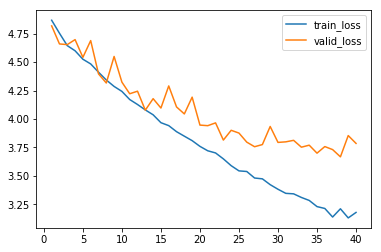

In [25]:
loss_df.plot();
# loss_df.to_csv('loss_df.csv')

In [18]:
# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [6]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

In [19]:
# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.656037


Test Accuracy: 13% (117/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [27]:
## TODO: Specify data loaders
# using same loaders as for the previous step
loaders_transfer = {'train':train_loader, 'valid':valid_loader, 'test':test_loader}

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

I will try two different models for this task to see if there's any noticable difference: ```VGG19``` and ```ResNet50```.

In [13]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
# define VGG19 model
model_transfer = models.vgg19(pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.torch/models/vgg19-dcbb9e9d.pth
100%|██████████| 574673361/574673361 [00:11<00:00, 51436581.42it/s]


Let's print out the ```classifier``` section of the model.

In [14]:
model_transfer.classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace)
  (2): Dropout(p=0.5)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace)
  (5): Dropout(p=0.5)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)

I will retrain the very last layer.

In [15]:
# freeze the parameters of the original model
for param in model_transfer.parameters():
    param.requires_grad = False
    
# respecify the last layer. Gradient calculation will be enabled for it.
model_transfer.classifier[6] = nn.Linear(4096, 133)

if use_cuda:
    model_transfer = model_transfer.cuda()

Chech the ```classifier``` again.

In [16]:
model_transfer.classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace)
  (2): Dropout(p=0.5)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace)
  (5): Dropout(p=0.5)
  (6): Linear(in_features=4096, out_features=133, bias=True)
)

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 
I modified the last fully connected layer of the CNN to output the desired number of classes. The default architecture is good enough to detect the necessary features in the images, and re-training the last layer to output the correct number of classes should do the trick.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [20]:
import torch.optim as optim
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.classifier[6].parameters(), lr = 0.005, momentum = 0.5)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [39]:
# train the model
model_transfer, loss_df_transfer = train(20, loaders_transfer, model_transfer,
                                         optimizer_transfer, criterion_transfer,
                                         use_cuda, 'model_transfer.pt')

Epoch: 1	Training Loss: 1.628409	Validation Loss: 1.259999                	Time: 235.17 seconds 
Validation loss decreased: inf -> 1.2599994713674763. Model saved.
Epoch: 2	Training Loss: 1.387734	Validation Loss: 1.120886                	Time: 234.62 seconds 
Validation loss decreased: 1.2599994713674763 -> 1.1208859926212333. Model saved.
Epoch: 3	Training Loss: 1.241175	Validation Loss: 1.004033                	Time: 234.77 seconds 
Validation loss decreased: 1.1208859926212333 -> 1.0040329378522086. Model saved.
Epoch: 4	Training Loss: 1.149495	Validation Loss: 0.969153                	Time: 234.68 seconds 
Validation loss decreased: 1.0040329378522086 -> 0.9691528285334924. Model saved.
Epoch: 5	Training Loss: 1.118677	Validation Loss: 1.021789                	Time: 234.46 seconds 
Epoch: 6	Training Loss: 1.062804	Validation Loss: 0.938474                	Time: 234.63 seconds 
Validation loss decreased: 0.9691528285334924 -> 0.9384739698407178. Model saved.
Epoch: 7	Training Loss:

```model_transfer``` was originally trained for 20 epoch and then for an additional 20 epochs. The loss graphs are below.

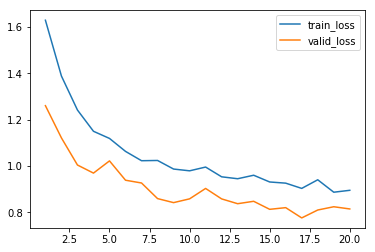

In [40]:
loss_df_transfer.plot();

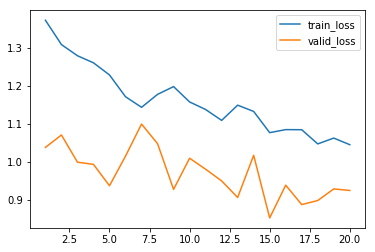

In [28]:
loss_df_transfer.plot();

In [17]:
# load the model that got the best validation accuracy
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [32]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.825832


Test Accuracy: 76% (636/836)


I'll repeat the previous steps with ```ResNet50```.

In [21]:
model_transfer_2 = models.resnet50(pretrained=True)
    
# freeze the parameters of the original model
for param in model_transfer_2.parameters():
    param.requires_grad = False

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:01<00:00, 58958437.91it/s]


Print out the very last layer and modify it.

In [22]:
model_transfer_2.fc

Linear(in_features=2048, out_features=1000, bias=True)

In [23]:
model_transfer_2.fc = nn.Linear(2048, 133)

if use_cuda:
    model_transfer_2 = model_transfer_2.cuda()

In [24]:
model_transfer_2.fc

Linear(in_features=2048, out_features=133, bias=True)

I will use the same loss function and optimizer as for ```VGG-19```.

In [25]:
criterion_transfer_2 = nn.CrossEntropyLoss()
optimizer_transfer_2 = optim.SGD(model_transfer_2.fc.parameters(), lr = 0.005, momentum = 0.5)

In [28]:
# train the model
model_transfer_2, loss_df_transfer_2 = train(20, loaders_transfer, model_transfer_2,
                                             optimizer_transfer_2, criterion_transfer_2,
                                             use_cuda, 'model_transfer_2.pt')

Epoch: 1	Training Loss: 1.048404	Validation Loss: 0.973573                	Time: 174.48 seconds 
Validation loss decreased: inf -> 0.9735727473647294. Model saved.
Epoch: 2	Training Loss: 1.064021	Validation Loss: 1.000530                	Time: 159.48 seconds 
Epoch: 3	Training Loss: 1.065404	Validation Loss: 0.901688                	Time: 159.45 seconds 
Validation loss decreased: 0.9735727473647294 -> 0.9016875946593141. Model saved.
Epoch: 4	Training Loss: 1.023483	Validation Loss: 0.957008                	Time: 159.26 seconds 
Epoch: 5	Training Loss: 1.030016	Validation Loss: 0.962611                	Time: 159.07 seconds 
Epoch: 6	Training Loss: 1.012688	Validation Loss: 0.949569                	Time: 159.17 seconds 
Epoch: 7	Training Loss: 0.997438	Validation Loss: 0.927336                	Time: 159.20 seconds 
Epoch: 8	Training Loss: 0.979120	Validation Loss: 0.928129                	Time: 159.14 seconds 
Epoch: 9	Training Loss: 0.986830	Validation Loss: 0.861698                	

```model_transfer_2``` was originally trained for 20 epoch and then for an additional 20 epochs. The loss graphs are below.

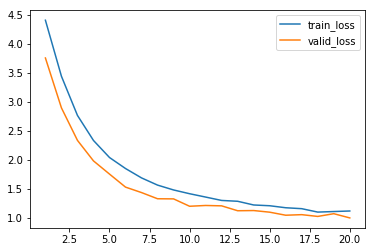

In [37]:
loss_df_transfer_2.plot();

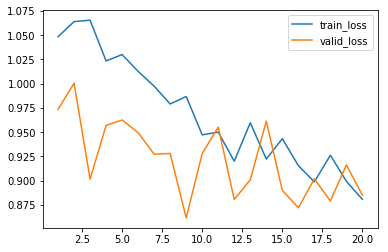

In [29]:
loss_df_transfer_2.plot();

In [31]:
# load the model that got the best validation accuracy
model_transfer_2.load_state_dict(torch.load('model_transfer_2.pt'))

In [46]:
test(loaders_transfer, model_transfer_2, criterion_transfer_2, use_cuda)

Test Loss: 0.895518


Test Accuracy: 76% (640/836)


```model_transfer_2``` test accuracy was 76% after the initial 20 epochs of training which led me to train it for another 20 epochs. And although the training and validation loss dropped, the test accuracy did not improve. Similarly, ```model_transfer``` was trained for 40 epochs in a 20-20 split. After the additional 20 epochs, the validation loss decreased, but testing accuracy remained about the same.

In [7]:
model_transfer_3 = models.resnet101(pretrained=True)
    
# freeze the parameters of the original model
for param in model_transfer_3.parameters():
    param.requires_grad = False

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.torch/models/resnet101-5d3b4d8f.pth
100%|██████████| 178728960/178728960 [00:03<00:00, 48028061.20it/s]


In [8]:
import torch.nn as nn

model_transfer_3.fc = nn.Linear(2048, 133, bias = True)

if use_cuda:
    model_transfer_3.cuda()

In [17]:
import torch.optim as optim
criterion_transfer_3 = nn.CrossEntropyLoss()
optimizer_transfer_3 = optim.SGD(model_transfer_3.fc.parameters(), lr = 0.0001)

In [10]:
# define loaders for model_transfer_3
import os
from torchvision import datasets

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
batch_size = 16

# specify train and test/validation transforms
train_transforms = transforms.Compose([transforms.RandomResizedCrop(224),
                                        transforms.RandomHorizontalFlip(),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

test_transforms = transforms.Compose([transforms.RandomResizedCrop(224),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

# specify file locations
train_loc = '/data/dog_images/train/'
valid_loc = '/data/dog_images/valid/'
test_loc = '/data/dog_images/test/'

# specify datasets
train_data = datasets.ImageFolder(train_loc, transform = train_transforms)
valid_data = datasets.ImageFolder(valid_loc, transform = test_transforms)
test_data = datasets.ImageFolder(test_loc, transform = test_transforms)

# specify dataloaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size, shuffle = True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size = batch_size)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = batch_size)

# specicy the loader dictionary for later use
loaders_model_transfer_3 = {'train':train_loader, 'valid':valid_loader, 'test':test_loader}

In [11]:
# train the model
model_transfer_3, loss_df_transfer_3 = train(20, loaders_model_transfer_3, model_transfer_3,
                                             optimizer_transfer_3, criterion_transfer_3,
                                             use_cuda, 'model_transfer_3.pt')

Epoch: 1	Training Loss: 3.822398	Validation Loss: 2.560650                	Time: 198.85 seconds 
Validation loss decreased: inf -> 2.560649907517576. Model saved.
Epoch: 2	Training Loss: 2.393848	Validation Loss: 1.648483                	Time: 183.69 seconds 
Validation loss decreased: 2.560649907517576 -> 1.6484825776722616. Model saved.
Epoch: 3	Training Loss: 1.748628	Validation Loss: 1.375787                	Time: 185.85 seconds 
Validation loss decreased: 1.6484825776722616 -> 1.375786582724063. Model saved.
Epoch: 4	Training Loss: 1.457811	Validation Loss: 1.166816                	Time: 183.00 seconds 
Validation loss decreased: 1.375786582724063 -> 1.1668162107467652. Model saved.
Epoch: 5	Training Loss: 1.272016	Validation Loss: 1.009193                	Time: 185.87 seconds 
Validation loss decreased: 1.1668162107467652 -> 1.0091928055186472. Model saved.
Epoch: 6	Training Loss: 1.163210	Validation Loss: 1.020499                	Time: 182.54 seconds 
Epoch: 7	Training Loss: 1.0

Loss graph after raining ```model_transfer_3``` using ```batch_size = 16``` and ```lr = 0.01``` for 20 epochs

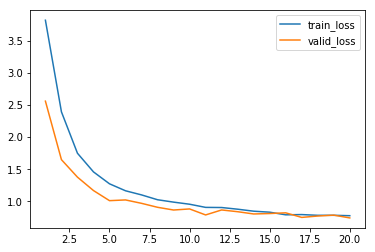

In [12]:
loss_df_transfer_3.plot()

In [15]:
# train the model
model_transfer_3, loss_df_transfer_3 = train(20, loaders_model_transfer_3, model_transfer_3,
                                             optimizer_transfer_3, criterion_transfer_3,
                                             use_cuda, 'model_transfer_3.pt')

Epoch: 1	Training Loss: 0.752111	Validation Loss: 0.724998                	Time: 187.07 seconds 
Validation loss decreased: inf -> 0.7249975239088435. Model saved.
Epoch: 2	Training Loss: 0.732769	Validation Loss: 0.727399                	Time: 183.56 seconds 
Epoch: 3	Training Loss: 0.729838	Validation Loss: 0.725169                	Time: 185.92 seconds 
Epoch: 4	Training Loss: 0.729261	Validation Loss: 0.793060                	Time: 183.39 seconds 
Epoch: 5	Training Loss: 0.708764	Validation Loss: 0.718624                	Time: 186.03 seconds 
Validation loss decreased: 0.7249975239088435 -> 0.7186241606038487. Model saved.
Epoch: 6	Training Loss: 0.728318	Validation Loss: 0.710097                	Time: 183.23 seconds 
Validation loss decreased: 0.7186241606038487 -> 0.7100966502092556. Model saved.
Epoch: 7	Training Loss: 0.699785	Validation Loss: 0.668610                	Time: 185.75 seconds 
Validation loss decreased: 0.7100966502092556 -> 0.6686104768050645. Model saved.
Epoch: 8

Loss graph after training for another 20 epochs with ```lr = 0.01```.

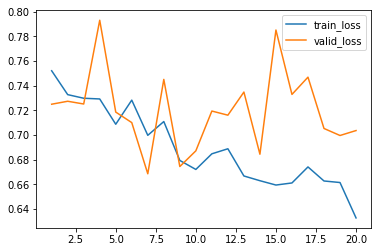

In [16]:
loss_df_transfer_3.plot()

Load best weights from the previous training session, set ```lr = 0.0025``` and train the model for another 20 epochs.

In [14]:
# train the model
model_transfer_3, loss_df_transfer_3 = train(20, loaders_model_transfer_3, model_transfer_3,
                                             optimizer_transfer_3, criterion_transfer_3,
                                             use_cuda, 'model_transfer_3.pt')

Epoch: 1	Training Loss: 0.680234	Validation Loss: 0.676004                	Time: 203.59 seconds 
Validation loss decreased: inf -> 0.6760035948839016. Model saved.
Epoch: 2	Training Loss: 0.674981	Validation Loss: 0.727608                	Time: 186.79 seconds 
Epoch: 3	Training Loss: 0.675955	Validation Loss: 0.639070                	Time: 187.99 seconds 
Validation loss decreased: 0.6760035948839016 -> 0.6390697513511795. Model saved.
Epoch: 4	Training Loss: 0.680269	Validation Loss: 0.743276                	Time: 184.60 seconds 
Epoch: 5	Training Loss: 0.657457	Validation Loss: 0.690696                	Time: 187.98 seconds 
Epoch: 6	Training Loss: 0.671859	Validation Loss: 0.690317                	Time: 184.94 seconds 
Epoch: 7	Training Loss: 0.686969	Validation Loss: 0.699954                	Time: 187.51 seconds 
Epoch: 8	Training Loss: 0.671546	Validation Loss: 0.701513                	Time: 185.47 seconds 
Epoch: 9	Training Loss: 0.671490	Validation Loss: 0.675344                	

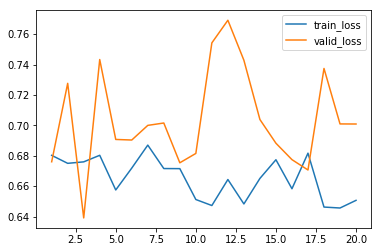

In [15]:
loss_df_transfer_3.plot()

Set ```lr = 0.001 ``` and train for another 20 epochs.

In [17]:
# train the model
model_transfer_3, loss_df_transfer_3 = train(20, loaders_model_transfer_3, model_transfer_3,
                                             optimizer_transfer_3, criterion_transfer_3,
                                             use_cuda, 'model_transfer_3.pt')

Epoch: 1	Training Loss: 0.672703	Validation Loss: 0.758995                	Time: 189.21 seconds 
Validation loss decreased: inf -> 0.7589950001703765. Model saved.
Epoch: 2	Training Loss: 0.639975	Validation Loss: 0.734244                	Time: 186.70 seconds 
Validation loss decreased: 0.7589950001703765 -> 0.7342436915386222. Model saved.
Epoch: 3	Training Loss: 0.650975	Validation Loss: 0.713903                	Time: 188.47 seconds 
Validation loss decreased: 0.7342436915386222 -> 0.7139034545171761. Model saved.
Epoch: 4	Training Loss: 0.656031	Validation Loss: 0.663918                	Time: 186.73 seconds 
Validation loss decreased: 0.7139034545171761 -> 0.6639184789029424. Model saved.
Epoch: 5	Training Loss: 0.655757	Validation Loss: 0.723562                	Time: 189.44 seconds 
Epoch: 6	Training Loss: 0.652412	Validation Loss: 0.735958                	Time: 185.08 seconds 
Epoch: 7	Training Loss: 0.650360	Validation Loss: 0.693636                	Time: 187.10 seconds 
Epoch: 8

(Didn't save/visualize ```loss_df``` after the previous training session.)

In [12]:
# train the model
model_transfer_3, loss_df_transfer_3 = train(20, loaders_model_transfer_3, model_transfer_3,
                                             optimizer_transfer_3, criterion_transfer_3,
                                             use_cuda, 'model_transfer_3.pt')

Epoch: 1	Training Loss: 0.638694	Validation Loss: 0.714828                	Time: 199.10 seconds 
Validation loss decreased: inf -> 0.7148279452752211. Model saved.
Epoch: 2	Training Loss: 0.644908	Validation Loss: 0.759198                	Time: 182.52 seconds 
Epoch: 3	Training Loss: 0.639185	Validation Loss: 0.722363                	Time: 185.28 seconds 
Epoch: 4	Training Loss: 0.645265	Validation Loss: 0.692223                	Time: 181.36 seconds 
Validation loss decreased: 0.7148279452752211 -> 0.6922229526999468. Model saved.
Epoch: 5	Training Loss: 0.638896	Validation Loss: 0.643907                	Time: 185.40 seconds 
Validation loss decreased: 0.6922229526999468 -> 0.6439071877630885. Model saved.
Epoch: 6	Training Loss: 0.631528	Validation Loss: 0.705342                	Time: 182.70 seconds 
Epoch: 7	Training Loss: 0.637733	Validation Loss: 0.698677                	Time: 184.13 seconds 
Epoch: 8	Training Loss: 0.636144	Validation Loss: 0.671226                	Time: 182.63 se

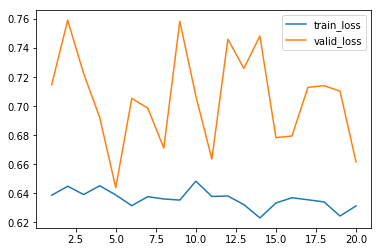

In [13]:
loss_df_transfer_3.plot()

In [14]:
test(loaders_model_transfer_3, model_transfer_3, criterion_transfer_3, use_cuda)

Test Loss: 0.726725


Test Accuracy: 79% (661/836)


In [15]:
# modify loaders for model_transfer_3
batch_size = 16

# specify train and test/validation transforms
train_transforms = transforms.Compose([transforms.RandomResizedCrop(224),
                                        transforms.RandomHorizontalFlip(),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

test_transforms_modified = transforms.Compose([transforms.Resize(size=(224,224)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

# specify file locations
train_loc = '/data/dog_images/train/'
valid_loc = '/data/dog_images/valid/'
test_loc = '/data/dog_images/test/'

# specify datasets
train_data = datasets.ImageFolder(train_loc, transform = train_transforms)
valid_data_modified = datasets.ImageFolder(valid_loc, transform = test_transforms_modified)
test_data_modified = datasets.ImageFolder(test_loc, transform = test_transforms_modified)

# specify dataloaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size, shuffle = True)
valid_loader_modified = torch.utils.data.DataLoader(valid_data_modified, batch_size = batch_size)
test_loader_modified = torch.utils.data.DataLoader(test_data_modified, batch_size = batch_size)

# specicy the loader dictionary for later use
loaders_model_transfer_3_modified = {'train':train_loader, 'valid':valid_loader_modified, 'test':test_loader_modified}

In [16]:
test(loaders_model_transfer_3_modified, model_transfer_3, criterion_transfer_3, use_cuda)

Test Loss: 0.403660


Test Accuracy: 87% (732/836)


Training for another 20 epochs with modified validation loaders and ```lr = 0.0001```. Saving model weights to a new .pt file.

In [18]:
# train the model
model_transfer_3, loss_df_transfer_3 = train(20, loaders_model_transfer_3_modified, model_transfer_3,
                                             optimizer_transfer_3, criterion_transfer_3,
                                             use_cuda, 'model_transfer_3_modified.pt')

Epoch: 1	Training Loss: 0.636873	Validation Loss: 0.363212                	Time: 186.88 seconds 
Validation loss decreased: inf -> 0.3632118242586444. Model saved.
Epoch: 2	Training Loss: 0.621416	Validation Loss: 0.362997                	Time: 183.55 seconds 
Validation loss decreased: 0.3632118242586444 -> 0.3629973503286967. Model saved.
Epoch: 3	Training Loss: 0.621982	Validation Loss: 0.374200                	Time: 186.22 seconds 
Epoch: 4	Training Loss: 0.627901	Validation Loss: 0.374392                	Time: 183.65 seconds 
Epoch: 5	Training Loss: 0.646873	Validation Loss: 0.359485                	Time: 187.23 seconds 
Validation loss decreased: 0.3629973503286967 -> 0.35948545436659257. Model saved.
Epoch: 6	Training Loss: 0.636477	Validation Loss: 0.364796                	Time: 183.92 seconds 
Epoch: 7	Training Loss: 0.626482	Validation Loss: 0.360029                	Time: 187.69 seconds 
Epoch: 8	Training Loss: 0.618646	Validation Loss: 0.379349                	Time: 183.99 s

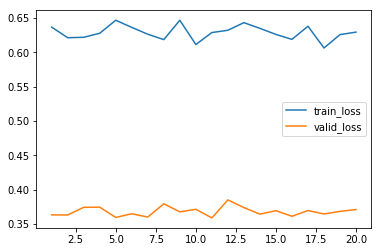

In [19]:
loss_df_transfer_3.plot()

In [20]:
test(loaders_model_transfer_3_modified, model_transfer_3, criterion_transfer_3, use_cuda)

Test Loss: 0.419197


Test Accuracy: 87% (733/836)


In [11]:
# load the model that got the best validation accuracy
model_transfer_3.load_state_dict(torch.load('model_transfer_3.pt'))

I will use ```model_transfer``` for the breed prediction.

### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [33]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in train_data.classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    transform = transforms.Compose([transforms.Resize((224, 224)),
                                    transforms.ToTensor(),
                                    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])
    
    # open image with Pillow
    img = Image.open(img_path)
    # transform and add a dimension
    img = transform(img).unsqueeze(0)
    
    # use CUDA if available
    if use_cuda:
        img = img.cuda()
    
    # set the model into evaluation mode
    model_transfer.eval()
    # get the class index by passing the image through the model
    predicted_class = torch.max(model_transfer(img),1)[1].item()
    
    return class_names[predicted_class]

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [36]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.
def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    img = Image.open(img_path)
    plt.figure()
    plt.axis('off')
    
    if dog_detector(img_path):
        print(f"It's a dog! Looks like a {predict_breed_transfer(img_path)}")
        plt.imshow(img)
        plt.show()
    elif face_detector_alt2(img_path):
        print(f"Hello, human! You look like a {predict_breed_transfer(img_path)}")
        plt.imshow(img)
        plt.show()
    else:
        print('Looks like there are no dogs or humans here.')
        plt.imshow(img)
        plt.show()

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)  
The models performed about as well as I expected them to do.  
Possible improvements:  
- Train the models for more epochs. The training and validation errors for both of the transfer learning models were still decreasing, and the performance should improve with more training time.
- Get more data for training to allow for either more breeds or better classification with the current breeds.
- Use a different set of transformations on the data. Perhaps adjust the rotation angle or crop area, or perform another augmentation. Also, computing the mean and standard deviation of the training images and using those values for normalizaion could make a difference (instead of the standarized values used for VGG-16 normalization). 
- Try a different base model, such as ```ResNet-101```. The higher complexity of that model can result in better prediction accuracy.
- Deploy the app for public use.

Hello, human! You look like a Pharaoh hound


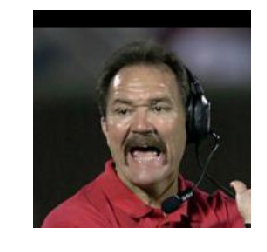

Hello, human! You look like a Poodle


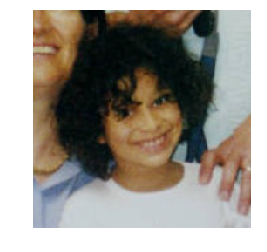

Hello, human! You look like a English toy spaniel


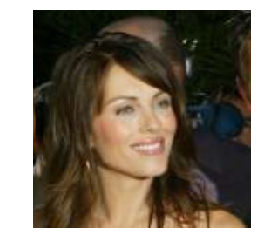

It's a dog! Looks like a Doberman pinscher


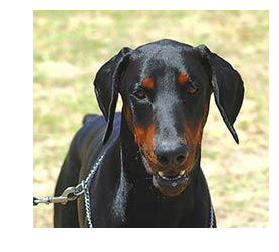

It's a dog! Looks like a Boston terrier


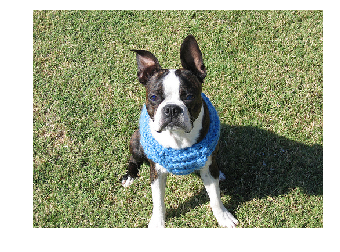

It's a dog! Looks like a Tibetan mastiff


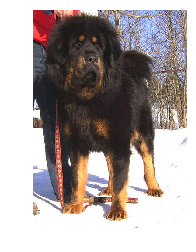

In [38]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in [human_files[31], human_files[389], human_files[659], dog_files[63], dog_files[731], dog_files[872]]:
    run_app(file)

Just for fun, I'll try the app on images that don't have people or dogs.

Hello, human! You look like a Icelandic sheepdog


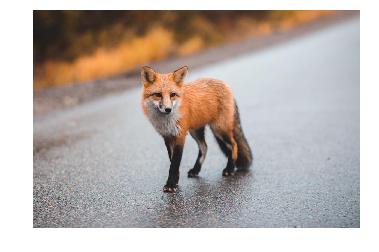

Looks like there are no dogs or humans here.


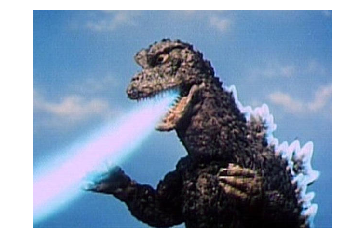

Looks like there are no dogs or humans here.


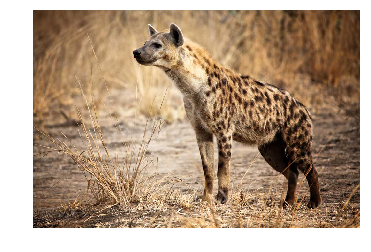

Looks like there are no dogs or humans here.


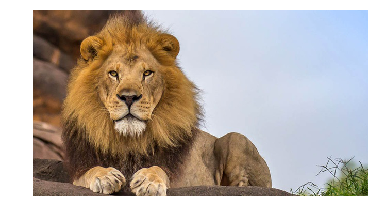

In [43]:
other_files = np.array(glob("other_ims/*"))

for file in other_files:
    run_app(file)